In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"C:\Users\gg787\ADP_데싸라면\adp_데이터모음\data\credit_final.csv")

In [169]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [170]:
df["credit.rating"].value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

In [171]:
feature = df.drop("credit.rating", axis = 1)
label = df["credit.rating"]

In [172]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_proba = rf.predict_proba(X_test)[:,1]
print("roc_auc_score : {}".format(roc_auc_score(y_test, pred_proba)))


roc_auc_score : 0.7777777777777778


<BarContainer object of 2 artists>

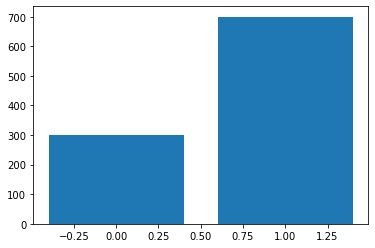

In [173]:
plt.bar(df["credit.rating"].value_counts().index, df["credit.rating"].value_counts().values)

In [174]:
from imblearn.under_sampling import RandomUnderSampler

X_resampled, y_resampled = RandomUnderSampler(random_state = 0).fit_resample(feature, label)

<BarContainer object of 2 artists>

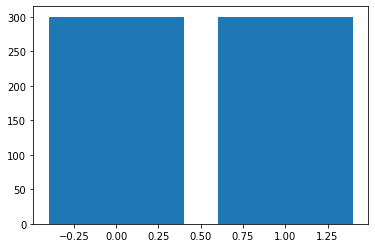

In [175]:
plt.bar(y_resampled.value_counts().index, y_resampled.value_counts().values)

리샘플링 된 데이터 roc_auc : 0.8416651841309375


C:\Users\gg787\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


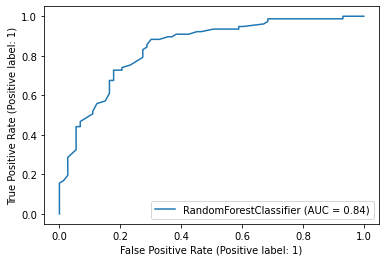

In [176]:
# 언더 샘플링 한 데이터셋으로 다시 성능 측정

X_resam_tr, X_resam_te, y_resam_tr, y_resam_te = train_test_split(X_resampled, y_resampled)

rf = RandomForestClassifier(random_state = 0)
rf.fit(X_resam_tr,y_resam_tr)

pred_proba = rf.predict_proba(X_resam_te)[:,1]
print("리샘플링 된 데이터 roc_auc : {}".format(roc_auc_score(y_resam_te,pred_proba)))

plot_roc_curve(rf, X_resam_te, y_resam_te)

### 오버샘플링 (SMOTE)

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv(r"C:\Users\gg787\ADP_데싸라면\adp_데이터모음\data\credit_final.csv")

In [178]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [179]:
feature = df.drop("credit.rating",axis = 1)
label = df["credit.rating"]

<BarContainer object of 2 artists>

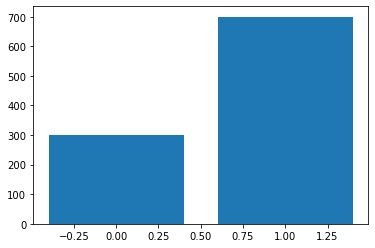

In [180]:
plt.bar(label.value_counts().index, label.value_counts().values)

In [181]:
# svm 을 시행하기전 스케일링 시행

scaler = StandardScaler()
scaler_df = scaler.fit_transform(feature)

X_train, X_test, y_train, y_test = train_test_split(scaler_df, label, test_size = 0.3)

In [182]:
y_train.value_counts()

1    504
0    196
Name: credit.rating, dtype: int64

In [183]:
svc = SVC(verbose= True, probability= True)
svc.fit(X_train, y_train)
pred_proba = svc.predict_proba(X_test)[:,1]
print("roc auc : {}".format(roc_auc_score(y_test,pred_proba)))

[LibSVM]roc auc : 0.7295427786499215


In [184]:
# 오버 샘플링 시행
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors= 5)

X_resampled, y_resampled = sm.fit_resample(scaler_df, label)

In [185]:
y_resampled.value_counts()

1    700
0    700
Name: credit.rating, dtype: int64

In [186]:
X_re_tr, X_re_te, y_re_tr,y_re_te = train_test_split(X_resampled, y_resampled, test_size = 0.3)

C:\Users\gg787\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


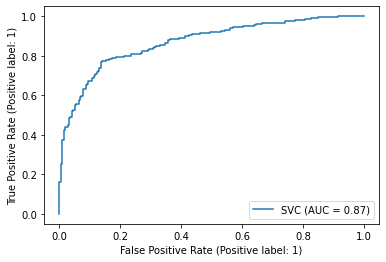

In [187]:
svc2 = SVC(probability= True)
svc2.fit(X_re_tr,y_re_tr)

plot_roc_curve(svc2, X_re_te,y_re_te)